# Simple Network with More Stages 

This section will focus on testing networks with 3 or more stages. The challenges encountered for extending beyond 3 stages are the same as before. The main issues that have been noticed in extending is finding the proper gains for the stages of the networks and potentially increasing the fifo depths to handle the network delay. This tuning of the parameters could potentially be done more efficiently by automatically normalize the gains which is on the list of things to do. 

The fifo depth tuning is also an issue with making things work. In general the depths should only effect the network throughput but given an issue with the control can lead to other effects. For this reason the depths have currently been set to avoid overflow conditions. 


## Hardware Details

Details of the architecture for this block can be found in the general documentation. 

## Code Generator Details

The code used for this example is contained in the following locations : 

1. [Test Generator](https://github.com/andywag/NeuralHDL/blob/master/src/test/scala/com/simplifide/generate/neural/MultiStageTest.scala)
1. [Block Generator](https://github.com/andywag/NeuralHDL/blob/master/src/main/scala/com/simplifide/generate/blocks/neural/simple/NeuralNetwork.scala)
1. [Generated Code and Test Results](https://github.com/andywag/NeuralHDL/tree/master/tests)

The main test code for this section is derived from this class for 3x3 or a similar class for 4x4 cases. 

```scala

class ThreeStageText(v:(Int,Int,Int)) extends TwoStageTest {
  override def blockName: String = s"three_${v._1}_${v._2}_${v._3}"

  override lazy val dataFill      = Seq(20,40,20)
  override lazy val errorFill     = Seq(40,40,40)
  override lazy val outputFill    = Seq(40,40,40)

  override lazy val numberNeurons = Seq(v._1,v._2,v._3)
  override lazy val dimensions = Seq((v._1,v._2),(v._2,v._2),(v._2,v._3))

  override lazy val tapEnable = List(1,1,1)
  override lazy val biasEnable = List(1,1,1)
  override lazy val gain = Seq(9,7,5).map(x => x-1)
  override def getTestLength = BasicTestInformation.tapLength*math.pow(2.0,8).toInt
  override lazy val tapScale:Seq[Double] = Seq(.5,.5,.5)
}

```


## Test Results

In [2]:
import sys
sys.path.append("../../python") # go to parent dir

import numpy as numpy
import matplotlib.pyplot as plt
import utils.FloatUtil as fu
import utils.PlotUtil as pu


def show_results(base,index) : 
    pu.handleStage(base,index, True)
    plt.show()
    
def show_all_results(base,length) : 
    [show_results(base,x) for x in reversed(range(length))]
    

### Three stage 6x6x6 Results

This test shows the results of a network with 3 stages which has 6 inputs and 6 outputs. This case uses the default test parameters shown in the main class above. 

Square Error 2 0.0392992311082


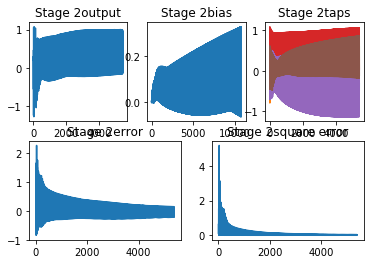

Square Error 1 0.026719015088


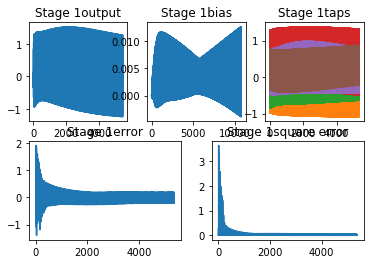

Square Error 0 0.0496251531796


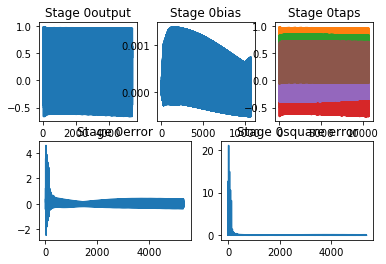

In [11]:
show_all_results("/home/andy/projects/NeuralHDL/tests/three6x6x6/data/",3)

### Three stage 8x8x8 Results

This test shows results of a 3 stage network with 8 inputs and outputs. The test generation code is shown below 
```scala
class Three8x8x8 extends ThreeStageText(8,8,8) {
  override def getTestLength = BasicTestInformation.tapLength*math.pow(2.0,12).toInt
  override lazy val tapEnable = List(1,1,1)
  override lazy val biasEnable = List(1,1,1)
  override lazy val tapScale:Seq[Double] = Seq(.5,.25,.5)
  override lazy val gain = Seq(9,6,3).map(_+1)
}
```

Square Error 2 0.0195445971663


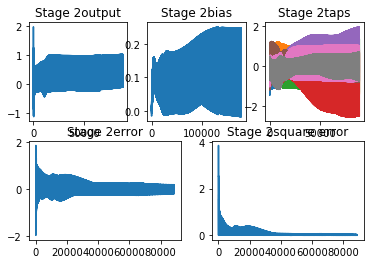

Square Error 1 0.0190291367855


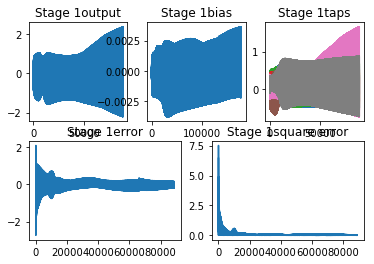

Square Error 0 0.0109371904265


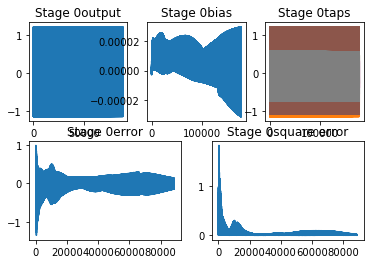

In [6]:
show_all_results("/home/andy/projects/NeuralHDL/tests/three_8_8_8/data/",3)

### Three stage 6x12x6 Results

This test shows results of a 3 stage network with where the first stage is 6x12, the second stage is 12x12 and the third stage is 12x6. This case currently suffers from the same issue as the 2 stage case with a similar structure. There is an issue with the back pressure logic which is causing some sample drops.   

```scala
class Three6x12x6 extends ThreeStageText(6,12,6) {}
```

Square Error 2 0.182585900121


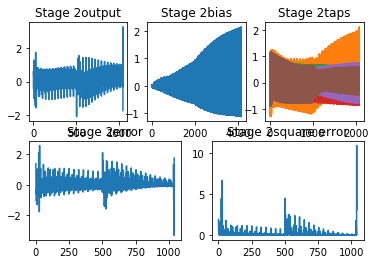

Square Error 1 0.185196992856


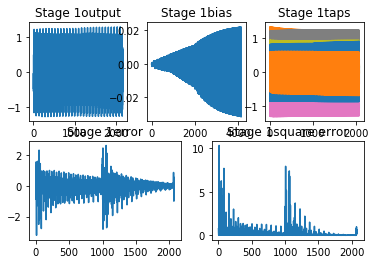

Square Error 0 0.330228534613


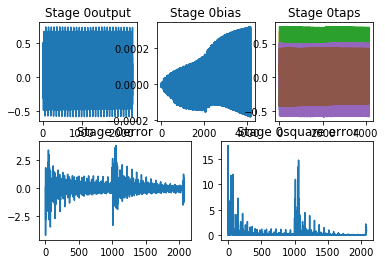

In [7]:
show_all_results("/home/andy/projects/NeuralHDL/tests/three_6_12_6/data/",3)

### Four Stage Results

This test shows the result of a 4 stage network. Extension to larger networks is straightforward given the self contained structure of the blocks. Larget tests are possible but have not been done due to the higher simulation time and effort in normalizing the settings. Further extensions will be done once the issues for the smaller networks have been resolved. The generator code is shown below with examples for 


```scala
class FourSame(siz:Int) extends TwoStageTest {
  override lazy val dataFill      = Seq(20,20,40,20)
  override lazy val errorFill     = Seq(10,10,10,10)
  override lazy val outputFill    = Seq(10,10,10,10)
  override def blockName: String = s"four${siz}${siz}"
  override lazy val numberNeurons = Seq(siz,siz,siz,siz,siz)
  override lazy val dimensions = Seq((siz,siz),(siz,siz),(siz,siz),(siz,siz))
  override lazy val tapType:BasicNetworkTest.TAP_TYPE = BasicNetworkTest.RAND_TAPS

  override lazy val tapEnable = List(1,1,1,1)
  override lazy val biasEnable = List(1,1,1,1)
  override lazy val gain = Seq(15,11,9,7).map(x => x)
  override def getTestLength = BasicTestInformation.tapLength*math.pow(2.0,12).toInt
  override lazy val disableNonlinearity = true
  override lazy val tapScale:Seq[Double] = Seq(.5,.5,.5,.5)
}
```

Square Error 3 0.356539536801


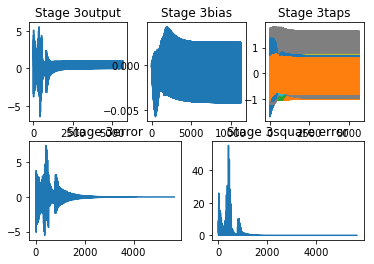

Square Error 2 0.907710037288


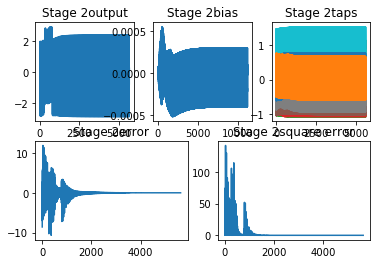

Square Error 1 2.13132876277


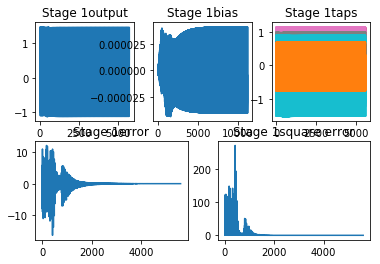

Square Error 0 3.71892428318


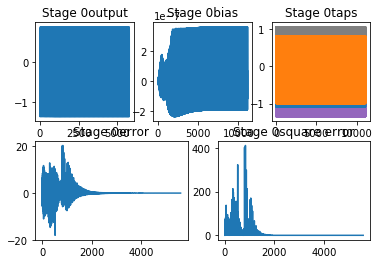

In [9]:
show_all_results("/home/andy/projects/NeuralHDL/tests/four_12_12/data/",4)